In [1]:
import numpy as np
import json
from PIL import Image, ImageDraw
import os
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [2]:
train_image_dir = "../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen"

image_paths_train = []

for i in os.listdir(train_image_dir):
    folder_path = os.path.join(train_image_dir, i)
    if i != '.DS_Store':
        image_paths_train.append(folder_path)

In [3]:
train_label_dir = "../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen"

label_paths_train = []

for i in os.listdir(train_label_dir):
    folder_path = os.path.join(train_label_dir, i)
    if i != '.DS_Store':
        label_paths_train.append(folder_path)

In [4]:
df_image_paths_train = pd.DataFrame({"Index": "", "Image_Path": image_paths_train})
df_label_paths_train = pd.DataFrame({"Index": "", "Target_Path": label_paths_train})

In [5]:
filter_instanceIds = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('instanceIds')]
filter_color = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('color')]
filter_labelIds = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('labelIds')]

df_label_paths_train = df_label_paths_train.drop(filter_instanceIds.index)
df_label_paths_train = df_label_paths_train.drop(filter_color.index)
df_label_paths_train = df_label_paths_train.drop(filter_labelIds.index)

In [6]:
print(len(df_image_paths_train))# X
print(len(df_label_paths_train))# y

174
174


In [7]:
index_tab = []
for el in df_image_paths_train['Image_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_leftImg8bit", "")
    index_tab.append(file_name)
df_image_paths_train['Index'] = index_tab

In [8]:
index_tab = []
for el in df_label_paths_train['Target_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_gtFine_polygons", "")
    index_tab.append(file_name)
df_label_paths_train['Index'] = index_tab

In [9]:
df_train = pd.merge(df_image_paths_train, df_label_paths_train, on='Index', how='left')
df_train

,Index,Image_Path,Target_Path
0,aachen_000079_000019,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000079_000019_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000079_000019_gtFine_polygons.json
1,aachen_000073_000019,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000073_000019_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000073_000019_gtFine_polygons.json
2,aachen_000100_000019,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000100_000019_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000100_000019_gtFine_polygons.json
3,aachen_000006_000019,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000006_000019_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000006_000019_gtFine_polygons.json
4,aachen_000037_000019,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000037_000019_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000037_000019_gtFine_polygons.json
...,...,...,...
169,aachen_000025_000019,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000025_000019_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000025_000019_gtFine_polygons.json
170,aachen_000156_000019,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000156_000019_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000156_000019_gtFine_polygons.json
171,aachen_000091_000019,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000091_000019_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000091_000019_gtFine_polygons.json
172,aachen_000050_000019,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000050_000019_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000050_000019_gtFine_polygons.json


In [10]:
val_image_dir = "../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt"

image_paths_val = []

for i in os.listdir(val_image_dir):
    folder_path = os.path.join(val_image_dir, i)
    if i != '.DS_Store':
        image_paths_val.append(folder_path)

In [11]:
val_label_dir = "../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt"

label_paths_val = []

for i in os.listdir(val_label_dir):
    folder_path = os.path.join(val_label_dir, i)
    if i != '.DS_Store':
        label_paths_val.append(folder_path)

In [12]:
df_image_paths_val = pd.DataFrame({"Index": "", "Image_Path": image_paths_val})
df_label_paths_val = pd.DataFrame({"Index": "", "Target_Path": label_paths_val})

In [13]:
filter_instanceIds = df_label_paths_val[df_label_paths_val['Target_Path'].str.contains('instanceIds')]
filter_color = df_label_paths_val[df_label_paths_val['Target_Path'].str.contains('color')]
filter_labelIds = df_label_paths_val[df_label_paths_val['Target_Path'].str.contains('labelIds')]

df_label_paths_val = df_label_paths_val.drop(filter_instanceIds.index)
df_label_paths_val = df_label_paths_val.drop(filter_color.index)
df_label_paths_val = df_label_paths_val.drop(filter_labelIds.index)

In [14]:
print(len(df_image_paths_val))# X
print(len(df_label_paths_val))# y

267
267


In [15]:
index_tab = []
for el in df_image_paths_val['Image_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_leftImg8bit", "")
    index_tab.append(file_name)
df_image_paths_val['Index'] = index_tab

In [16]:
index_tab = []
for el in df_label_paths_val['Target_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_gtFine_polygons", "")
    index_tab.append(file_name)
df_label_paths_val['Index'] = index_tab

In [17]:
df_val = pd.merge(df_image_paths_val, df_label_paths_val, on='Index', how='left')
df_val = df_val.loc[:35]
df_val

,Index,Image_Path,Target_Path
0,frankfurt_000001_046504,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000001_046504_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000001_046504_gtFine_polygons.json
1,frankfurt_000000_004617,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000000_004617_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000000_004617_gtFine_polygons.json
2,frankfurt_000001_035144,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000001_035144_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000001_035144_gtFine_polygons.json
3,frankfurt_000000_000576,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000000_000576_gtFine_polygons.json
4,frankfurt_000001_062250,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000001_062250_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000001_062250_gtFine_polygons.json
5,frankfurt_000001_038245,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000001_038245_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000001_038245_gtFine_polygons.json
6,frankfurt_000001_073243,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000001_073243_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000001_073243_gtFine_polygons.json
7,frankfurt_000001_072295,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000001_072295_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_polygons.json
8,frankfurt_000001_008688,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000001_008688_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000001_008688_gtFine_polygons.json
9,frankfurt_000000_016286,../../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000000_016286_leftImg8bit.png,../../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000000_016286_gtFine_polygons.json


# Préparation Data Train

In [18]:
for i in range(len(df_train)):
    img = Image.open(df_train['Image_Path'][i])
    file_path = df_train['Index'][i]
    img.save(f'./images/{file_path}.png')

In [19]:
for i in range(len(df_train)):
    path_JSON = df_train['Target_Path'][i]
    file_path = df_train['Index'][i]
    with open(path_JSON, 'r') as f:
        json_file = json.load(f)
    img = Image.new("RGB", (json_file['imgWidth'], json_file['imgHeight']), "black")
    draw = ImageDraw.Draw(img)

    for object in json_file['objects']:
        polygon_annotation = []
        """ VEHICLE """
        if object['label'] == 'car':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'truck':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'bus':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'on rails':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'motorcycle':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'bicycle':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'caravan':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'trailer':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
            """ FLAT """
        elif object['label'] == 'road':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(0, 0, 142, 255))
        elif object['label'] == 'sidewalk':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(0, 0, 142, 255))
        elif object['label'] == 'parking':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(0, 0, 142, 255))
        elif object['label'] == 'rail track':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(0, 0, 142, 255))
            """ HUMAN """
        elif object['label'] == 'person':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(102, 102, 156, 255))
        elif object['label'] == 'rider':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(102, 102, 156, 255))
            """ CONSTRUCTION """
        elif object['label'] == 'building':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
        elif object['label'] == 'wall':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
        elif object['label'] == 'fence':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
        elif object['label'] == 'guard rail':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
        elif object['label'] == 'bridge':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
        elif object['label'] == 'tunnel':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
            """ OBJECT """
        elif object['label'] == 'pole':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(153, 153, 153, 255))
        elif object['label'] == 'pole group':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(153, 153, 153, 255))
        elif object['label'] == 'traffic sign':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(153, 153, 153, 255))
        elif object['label'] == 'traffic light':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(153, 153, 153, 255))
            """ NATURE """
        elif object['label'] == 'vegetation':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(244, 35, 232, 255))
        elif object['label'] == 'terrain':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(244, 35, 232, 255))
            """ SKY """
        elif object['label'] == 'sky':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(70, 70, 70, 255))
            """ VOID """
        elif object['label'] == 'ground':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(70, 130, 180, 255))
        elif object['label'] == 'dynamic':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(70, 130, 180, 255))
        elif object['label'] == 'static':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(70, 130, 180, 255)) 
        else : pass
    img.save(f'./masks/{file_path}.png')

# Préparation Data val

In [20]:
for i in range(len(df_val)):
    img = Image.open(df_val['Image_Path'][i])
    file_path = df_val['Index'][i]
    img.save(f'./images_val/{file_path}.png')

In [21]:
for i in range(len(df_val)):
    path_JSON = df_val['Target_Path'][i]
    file_path = df_val['Index'][i]
    with open(path_JSON, 'r') as f:
        json_file = json.load(f)
    img = Image.new("RGB", (json_file['imgWidth'], json_file['imgHeight']), "black")
    draw = ImageDraw.Draw(img)

    for object in json_file['objects']:
        polygon_annotation = []
        """ VEHICLE """
        if object['label'] == 'car':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'truck':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'bus':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'on rails':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'motorcycle':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'bicycle':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'caravan':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
        elif object['label'] == 'trailer':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(250, 170, 30, 255))
            """ FLAT """
        elif object['label'] == 'road':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(0, 0, 142, 255))
        elif object['label'] == 'sidewalk':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(0, 0, 142, 255))
        elif object['label'] == 'parking':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(0, 0, 142, 255))
        elif object['label'] == 'rail track':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(0, 0, 142, 255))
            """ HUMAN """
        elif object['label'] == 'person':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(102, 102, 156, 255))
        elif object['label'] == 'rider':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(102, 102, 156, 255))
            """ CONSTRUCTION """
        elif object['label'] == 'building':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
        elif object['label'] == 'wall':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
        elif object['label'] == 'fence':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
        elif object['label'] == 'guard rail':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
        elif object['label'] == 'bridge':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
        elif object['label'] == 'tunnel':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(220, 20, 60, 255))
            """ OBJECT """
        elif object['label'] == 'pole':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(153, 153, 153, 255))
        elif object['label'] == 'pole group':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(153, 153, 153, 255))
        elif object['label'] == 'traffic sign':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(153, 153, 153, 255))
        elif object['label'] == 'traffic light':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(153, 153, 153, 255))
            """ NATURE """
        elif object['label'] == 'vegetation':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(244, 35, 232, 255))
        elif object['label'] == 'terrain':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(244, 35, 232, 255))
            """ SKY """
        elif object['label'] == 'sky':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(70, 70, 70, 255))
            """ VOID """
        elif object['label'] == 'ground':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(70, 130, 180, 255))
        elif object['label'] == 'dynamic':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(70, 130, 180, 255))
        elif object['label'] == 'static':
            for x, y in object['polygon']:
                polygon_annotation.append((x, y))
            draw.polygon(polygon_annotation, fill=(70, 130, 180, 255)) 
        else : pass
    img.save(f'./masks_val/{file_path}.png')

# Partie entraînement local - Récupération image local

In [22]:
import numpy as np
import json
from PIL import Image, ImageDraw
import os
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [23]:
train_image_dir = "./images"

image_paths_train = []

for i in os.listdir(train_image_dir):
    folder_path = os.path.join(train_image_dir, i)
    if i != '.DS_Store':
        image_paths_train.append(folder_path)

In [24]:
train_label_dir = "./masks"

label_paths_train = []

for i in os.listdir(train_label_dir):
    folder_path = os.path.join(train_label_dir, i)
    if i != '.DS_Store':
        label_paths_train.append(folder_path)

In [25]:
df_image_paths_train = pd.DataFrame({"Index": "", "Image_Path": image_paths_train})
df_label_paths_train = pd.DataFrame({"Index": "", "Target_Path": label_paths_train})

In [26]:
print(len(df_image_paths_train))# X
print(len(df_label_paths_train))# y

174
174


In [27]:
index_tab = []
for el in df_image_paths_train['Image_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    index_tab.append(file_name)
df_image_paths_train['Index'] = index_tab

In [28]:
index_tab = []
for el in df_label_paths_train['Target_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    index_tab.append(file_name)
df_label_paths_train['Index'] = index_tab

In [29]:
df_train = pd.merge(df_image_paths_train, df_label_paths_train, on='Index', how='left')
df_train

,Index,Image_Path,Target_Path
0,aachen_000008_000019,./images/aachen_000008_000019.png,./masks/aachen_000008_000019.png
1,aachen_000149_000019,./images/aachen_000149_000019.png,./masks/aachen_000149_000019.png
2,aachen_000095_000019,./images/aachen_000095_000019.png,./masks/aachen_000095_000019.png
3,aachen_000014_000019,./images/aachen_000014_000019.png,./masks/aachen_000014_000019.png
4,aachen_000023_000019,./images/aachen_000023_000019.png,./masks/aachen_000023_000019.png
...,...,...,...
169,aachen_000053_000019,./images/aachen_000053_000019.png,./masks/aachen_000053_000019.png
170,aachen_000112_000019,./images/aachen_000112_000019.png,./masks/aachen_000112_000019.png
171,aachen_000125_000019,./images/aachen_000125_000019.png,./masks/aachen_000125_000019.png
172,aachen_000006_000019,./images/aachen_000006_000019.png,./masks/aachen_000006_000019.png


In [30]:
val_image_dir = "./images_val"

image_paths_val = []

for i in os.listdir(val_image_dir):
    folder_path = os.path.join(val_image_dir, i)
    if i != '.DS_Store':
        image_paths_val.append(folder_path)

In [31]:
val_label_dir = "./masks_val"

label_paths_val = []

for i in os.listdir(val_label_dir):
    folder_path = os.path.join(val_label_dir, i)
    if i != '.DS_Store':
        label_paths_val.append(folder_path)

In [32]:
df_image_paths_val = pd.DataFrame({"Index": "", "Image_Path": image_paths_val})
df_label_paths_val = pd.DataFrame({"Index": "", "Target_Path": label_paths_val})

In [33]:
print(len(df_image_paths_val))# X
print(len(df_label_paths_val))# y

36
36


In [34]:
index_tab = []
for el in df_image_paths_val['Image_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    index_tab.append(file_name)
df_image_paths_val['Index'] = index_tab

In [35]:
index_tab = []
for el in df_label_paths_val['Target_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    index_tab.append(file_name)
df_label_paths_val['Index'] = index_tab

In [36]:
df_val = pd.merge(df_image_paths_val, df_label_paths_val, on='Index', how='left')
df_val

,Index,Image_Path,Target_Path
0,frankfurt_000001_013496,./images_val/frankfurt_000001_013496.png,./masks_val/frankfurt_000001_013496.png
1,frankfurt_000001_072295,./images_val/frankfurt_000001_072295.png,./masks_val/frankfurt_000001_072295.png
2,frankfurt_000001_065850,./images_val/frankfurt_000001_065850.png,./masks_val/frankfurt_000001_065850.png
3,frankfurt_000001_062250,./images_val/frankfurt_000001_062250.png,./masks_val/frankfurt_000001_062250.png
4,frankfurt_000001_054640,./images_val/frankfurt_000001_054640.png,./masks_val/frankfurt_000001_054640.png
5,frankfurt_000001_051516,./images_val/frankfurt_000001_051516.png,./masks_val/frankfurt_000001_051516.png
6,frankfurt_000000_018797,./images_val/frankfurt_000000_018797.png,./masks_val/frankfurt_000000_018797.png
7,frankfurt_000001_042384,./images_val/frankfurt_000001_042384.png,./masks_val/frankfurt_000001_042384.png
8,frankfurt_000001_008688,./images_val/frankfurt_000001_008688.png,./masks_val/frankfurt_000001_008688.png
9,frankfurt_000001_054219,./images_val/frankfurt_000001_054219.png,./masks_val/frankfurt_000001_054219.png


# Création modèle

In [59]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from keras.losses import SparseCategoricalCrossentropy
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [38]:
def unet_model(input_shape, num_classes):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(drop5)
    up6 = concatenate([up6, drop4], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(conv9)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

input_shape = (256, 256, 3)  # Taille d'entrée de l'image
num_classes = 8
model = unet_model(input_shape, num_classes)

In [46]:
input_shape2 = (256, 256, 3)
imgX = Image.open(df_val['Target_Path'][0])
img_array = img_to_array(imgX.resize(input_shape2[:2], Image.NEAREST))
img_array.shape

(256, 256, 3)

In [47]:
img_not_array = Image.fromarray(img_array.astype('uint8'))
colors = img_not_array.getcolors(maxcolors=1000000)
num_colors = len(colors)
print(f'Le nombre de couleurs unique est de {num_colors}')
print('--------------------------------------------')
for color in colors:
    print("Couleur :", color[1])

Le nombre de couleurs unique est de 8
--------------------------------------------
Couleur : (250, 170, 30)
Couleur : (0, 0, 142)
Couleur : (102, 102, 156)
Couleur : (220, 20, 60)
Couleur : (153, 153, 153)
Couleur : (244, 35, 232)
Couleur : (70, 70, 70)
Couleur : (70, 130, 180)


In [55]:
input_shape2 = (256, 256, 3)

def load_data(df):
    images_tab = []
    masks_tab = []
    for i in range(len(df)):
        image_path = df['Image_Path'][i]
        mask_path = df['Target_Path'][i]
        image = img_to_array(Image.open(image_path).convert('RGB').resize(input_shape[:2]))
        images_tab.append(image)

        img_array = img_to_array(Image.open(mask_path).resize(input_shape2[:2], Image.NEAREST))
        for x in range(img_array.shape[0]):
            for y in range(img_array.shape[1]):
                if (img_array[x, y] == [250, 170, 30]).all():
                    img_array[x, y] = 0
                elif (img_array[x, y] == [0, 0, 142]).all():
                    img_array[x, y] = 1
                elif (img_array[x, y] == [102, 102, 156]).all():
                    img_array[x, y] = 2
                elif (img_array[x, y] == [220, 20, 60]).all():
                    img_array[x, y] = 3
                elif (img_array[x, y] == [153, 153, 153]).all():
                    img_array[x, y] = 4
                elif (img_array[x, y] == [244, 35, 232]).all():
                    img_array[x, y] = 5
                elif (img_array[x, y] == [70, 70, 70]).all():
                    img_array[x, y] = 6
                elif (img_array[x, y] == [70, 130, 180]).all():
                    img_array[x, y] = 7
        img_transformed = img_array[:, :, 0:1]
        mask = img_transformed
        masks_tab.append(mask)

    images_tab = np.array(images_tab)
    masks_tab = np.array(masks_tab)
    return images_tab, masks_tab

In [56]:
images, masks = load_data(df_train)
images_val, masks_val = load_data(df_val)
print("Nombre total d'images chargées:", len(images))
print("Nombre total de masks chargées:", len(masks))
print("Nombre total d'images de validation chargées:", len(images_val))
print("Nombre total de masks de validation chargées:", len(masks_val))

Nombre total d'images chargées: 174
Nombre total de masks chargées: 174
Nombre total d'images de validation chargées: 36
Nombre total de masks de validation chargées: 36


In [103]:
X_train = images 
X_val = images_val
y_train = masks
y_val = masks_val
#y_train = to_categorical(masks, 8)
#y_val = to_categorical(masks_val, 8)

In [63]:
model = unet_model(input_shape, num_classes)

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 408s 65s/step - accuracy: 0.2215 - loss: 7.8529 - val_accuracy: 0.1022 - val_loss: 3.1181
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 383s 63s/step - accuracy: 0.2866 - loss: 2.2442 - val_accuracy: 0.1749 - val_loss: 2.2401
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 375s 62s/step - accuracy: 0.3270 - loss: 1.7546 - val_accuracy: 0.4756 - val_loss: 1.6790
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 371s 61s/step - accuracy: 0.4404 - loss: 1.6858 - val_accuracy: 0.4760 - val_loss: 1.6588
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 369s 61s/step - accuracy: 0.4570 - loss: 1.5806 - val_accuracy: 0.2718 - val_loss: 1.7435
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 361s 60s/step - accuracy: 0.5195 - loss: 1.5153 - val_accuracy: 0.5054 - val_loss: 1.5667
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 381s 63s/step - accuracy: 0.4412 - loss: 1.7905 - val_accuracy: 0.4812 - val_loss: 1.8389
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 395s 65s/step - accuracy: 0.4725 - loss: 1.6003 - val_accuracy: 0.4848 - val_loss:

# Test d'affichage

In [104]:
y_train.shape

(174, 256, 256, 1)

In [105]:
X_train.shape

(174, 256, 256, 3)

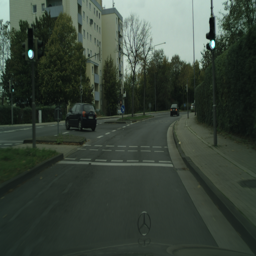

In [107]:
first_image_array = X_train[1].copy()
first_image_array = np.uint8(first_image_array)
pil_image = Image.fromarray(first_image_array)
pil_image

In [101]:
first_image_array

array([[[186, 217, 206],
        [186, 218, 208],
        [187, 217, 208],
        ...,
        [110, 135, 124],
        [111, 130, 126],
        [ 64,  86,  80]],

       [[186, 216, 206],
        [184, 214, 205],
        [186, 215, 207],
        ...,
        [ 93, 117, 109],
        [ 92, 109, 103],
        [ 48,  70,  62]],

       [[181, 212, 202],
        [182, 212, 203],
        [186, 216, 207],
        ...,
        [ 61,  85,  70],
        [ 56,  74,  60],
        [ 35,  52,  43]],

       ...,

       [[ 29,  40,  35],
        [ 29,  40,  35],
        [ 29,  40,  35],
        ...,
        [ 37,  49,  39],
        [ 28,  38,  32],
        [ 26,  36,  31]],

       [[ 29,  40,  34],
        [ 28,  39,  35],
        [ 29,  40,  35],
        ...,
        [ 39,  52,  42],
        [ 34,  45,  37],
        [ 28,  37,  32]],

       [[ 29,  39,  33],
        [ 29,  39,  34],
        [ 29,  40,  35],
        ...,
        [ 37,  50,  40],
        [ 35,  48,  40],
        [ 33,  44,  36]]

In [102]:
first_image_array[0, 0]

array([186, 217, 206], dtype=uint8)

In [108]:
first_mask_array = y_train[0].copy()
first_mask_array = np.uint8(first_mask_array)

In [110]:
first_mask_array[0, 0]

array([5], dtype=uint8)

In [116]:
for x in range(first_mask_array.shape[0]):
    for y in range(first_mask_array.shape[1]):
        if (first_mask_array[x, y] == [0]).all():
            first_mask_array[x, y] = [250, 170, 30]
        elif (first_mask_array[x, y] == [1]).all():
            first_mask_array[x, y] = [0, 0, 142]
        elif (first_mask_array[x, y] == [2]).all():
            first_mask_array[x, y] = [102, 102, 156]
        elif (first_mask_array[x, y] == [3]).all():
            first_mask_array[x, y] = [220, 20, 60]
        elif (first_mask_array[x, y] == [4]).all():
            first_mask_array[x, y] = [153, 153, 153]
        elif (first_mask_array[x, y] == [5]).all():
            first_mask_array[x, y] = [244, 35, 232]
        elif (first_mask_array[x, y] == [6]).all():
            first_mask_array[x, y] = [70, 70, 70]
        elif (first_mask_array[x, y] == [7]).all():
            first_mask_array[x, y] = [70, 130, 180]

ValueError: could not broadcast input array from shape (3,) into shape (1,)

In [118]:
first_mask_array.shape

(256, 256, 1)

In [119]:
testX = first_mask_array.copy()
testX = testX.reshape(256, 256, 3)
testX.shape

ValueError: cannot reshape array of size 65536 into shape (256,256,3)

In [120]:
for x in range(first_mask_array.shape[0]):
    for y in range(first_mask_array.shape[1]):
        if np.array_equal(first_mask_array[x, y], [0]):
            first_mask_array[x, y] = [250, 170, 30]
        elif np.array_equal(first_mask_array[x, y], [1]):
            first_mask_array[x, y] = [0, 0, 142]
        elif np.array_equal(first_mask_array[x, y], [2]):
            first_mask_array[x, y] = [102, 102, 156]
        elif np.array_equal(first_mask_array[x, y], [3]):
            first_mask_array[x, y] = [220, 20, 60]
        elif np.array_equal(first_mask_array[x, y], [4]):
            first_mask_array[x, y] = [153, 153, 153]
        elif np.array_equal(first_mask_array[x, y], [5]):
            first_mask_array[x, y] = [244, 35, 232]
        elif np.array_equal(first_mask_array[x, y], [6]):
            first_mask_array[x, y] = [70, 70, 70]
        elif np.array_equal(first_mask_array[x, y], [7]):
            first_mask_array[x, y] = [70, 130, 180]

ValueError: could not broadcast input array from shape (3,) into shape (1,)

In [121]:
transformed_array = np.repeat(first_mask_array, 3, axis=2)

# Affichage de la nouvelle forme du tableau
print(transformed_array.shape)  # Cela devrait afficher (256, 256, 3)

(256, 256, 3)


In [122]:
transformed_array

array([[[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)